## Lesson 3. Subset Time Series By Dates Python Using Pandas

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle datetime conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style='whitegrid')

In [6]:
data_path = et.data.get_data('colorado-flood', replace=True)

Extracted output to C:\Users\Glen Shennan\earth-analytics\data\colorado-flood\.


In [8]:
file_path = os.path.join(data_path, 'precipitation', '805325-precip-dailysum-2003-2013.csv')

In [9]:
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                       parse_dates=['DATE'],
                                       index_col=['DATE'],
                                       na_values=['999.99'])
boulder_precip_2003_2013.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
2003-01-05,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,5
2003-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
2003-02-02,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,33
2003-02-03,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,34


In [11]:
boulder_precip_2003_2013['2013'].tail()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-12-04,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,338
2013-12-22,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,356
2013-12-23,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,357
2013-12-29,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,363
2013-12-31,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,365


In [20]:
boulder_precip_2003_2013[boulder_precip_2003_2013.index.month == 3]

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-03-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,60
2003-03-02,0.3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,61
2003-03-05,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,64
2003-03-17,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,76
2003-03-18,1.8,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,77
...,...,...,...,...,...,...,...,...
2013-03-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,2013,60
2013-03-04,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,2013,63
2013-03-09,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,2013,68


In [24]:
boulder_precip_march = boulder_precip_2003_2013[boulder_precip_2003_2013.index.month==3]
boulder_precip_march

ValueError: Item wrong length 71 instead of 792.

In [22]:
boulder_precip_march_8 = boulder_precip_march[boulder_precip_march.index.day==8]
boulder_precip_march_8

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2006-03-08,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2006,67


In [26]:
print(boulder_precip_2003_2013.index.min(), boulder_precip_2003_2013.index.max())

2003-01-01 00:00:00 2013-12-31 00:00:00


#### Plot Temporal Subsets From Pandas Dataframe

In [27]:
precip_may_aug_2005 = boulder_precip_2003_2013["2005-05-01":'2005-08-31']

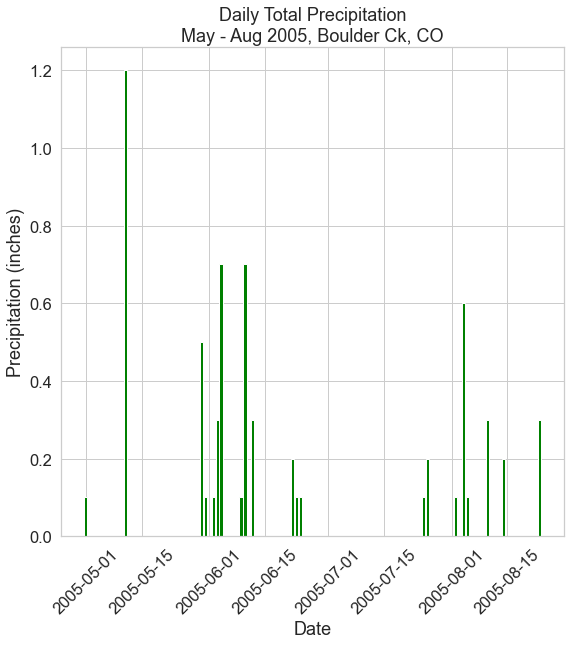

In [28]:
f, ax = plt.subplots(figsize=(9,9))
ax.bar(precip_may_aug_2005.index.values,
       precip_may_aug_2005['DAILY_PRECIP'],
       color='green')
ax.set(xlabel='Date',
       ylabel='Precipitation (inches)',
       title='Daily Total Precipitation\nMay - Aug 2005, Boulder Ck, CO')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [31]:
boulder_precip_2003_2013.index.weekofyear

<ipython-input-31-29165d384fed>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  boulder_precip_2003_2013.index.week


Int64Index([ 1,  1,  5,  5,  6,  6,  6,  6,  7,  8,
            ...
            44, 45, 47, 48, 48, 49, 51, 52, 52,  1],
           dtype='int64', name='DATE', length=792)

In [38]:
boulder_precip_2003_2013[boulder_precip_2003_2013.index.isocalendar().week==36]

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-09-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,244
2004-09-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2004,245
2004-09-05,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2004,249
2006-09-09,0.2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2006,252
2006-09-10,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2006,253
2008-09-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2008,245
2008-09-05,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2008,249
2009-09-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,2009,244
2010-09-08,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,2010,251


In [39]:
boulder_precip_2003_2013.iloc[0:20,:]

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
2003-01-05,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,5
2003-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
2003-02-02,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,33
2003-02-03,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,34
2003-02-05,0.2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,36
2003-02-06,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,37
2003-02-07,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,38
2003-02-10,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,41
